---
> # **라이브러리 호출**
---

In [1]:
import numpy as np
import pandas as pd # 정형데이터 전처리 / 통계 연산 수행
import seaborn as sns # 통계적 시각화 연산
import matplotlib as mpl # 시각화 옵션 (외부)
import matplotlib.pyplot as plt # 시각화 옵션 (내부)
import plotly.express as px # 동적 그래프 시각화
import scipy.stats as stats # 통계적 가설 검정 수행

mpl.rc('font',family='Malgun Gothic') # 한글 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 오류 해결

---
> # **결측치 라이브러리**
> - ### !pip install --user missingno
---

In [2]:
#!pip install --user missingno

In [3]:
import missingno as msno

In [4]:
df1 = pd.read_csv("01_Data.csv")
df1.isnull().sum()

Index               0
Member_ID           0
Sales_Type          0
Contract_Type       0
Channel             0
Datetime            0
Term                0
Payment_Type        0
Product_Type        0
Amount_Month        0
Customer_Type       2
Age              6972
Address1            2
Address2            2
State               0
Overdue_count       0
Overdue_Type        0
Gender              0
Credit_Rank      8781
Bank             2759
dtype: int64

- #### **msno.bar** : 각 항목별 실측값의 개수와 결측치의 비율을 막대로 표현

<AxesSubplot: >

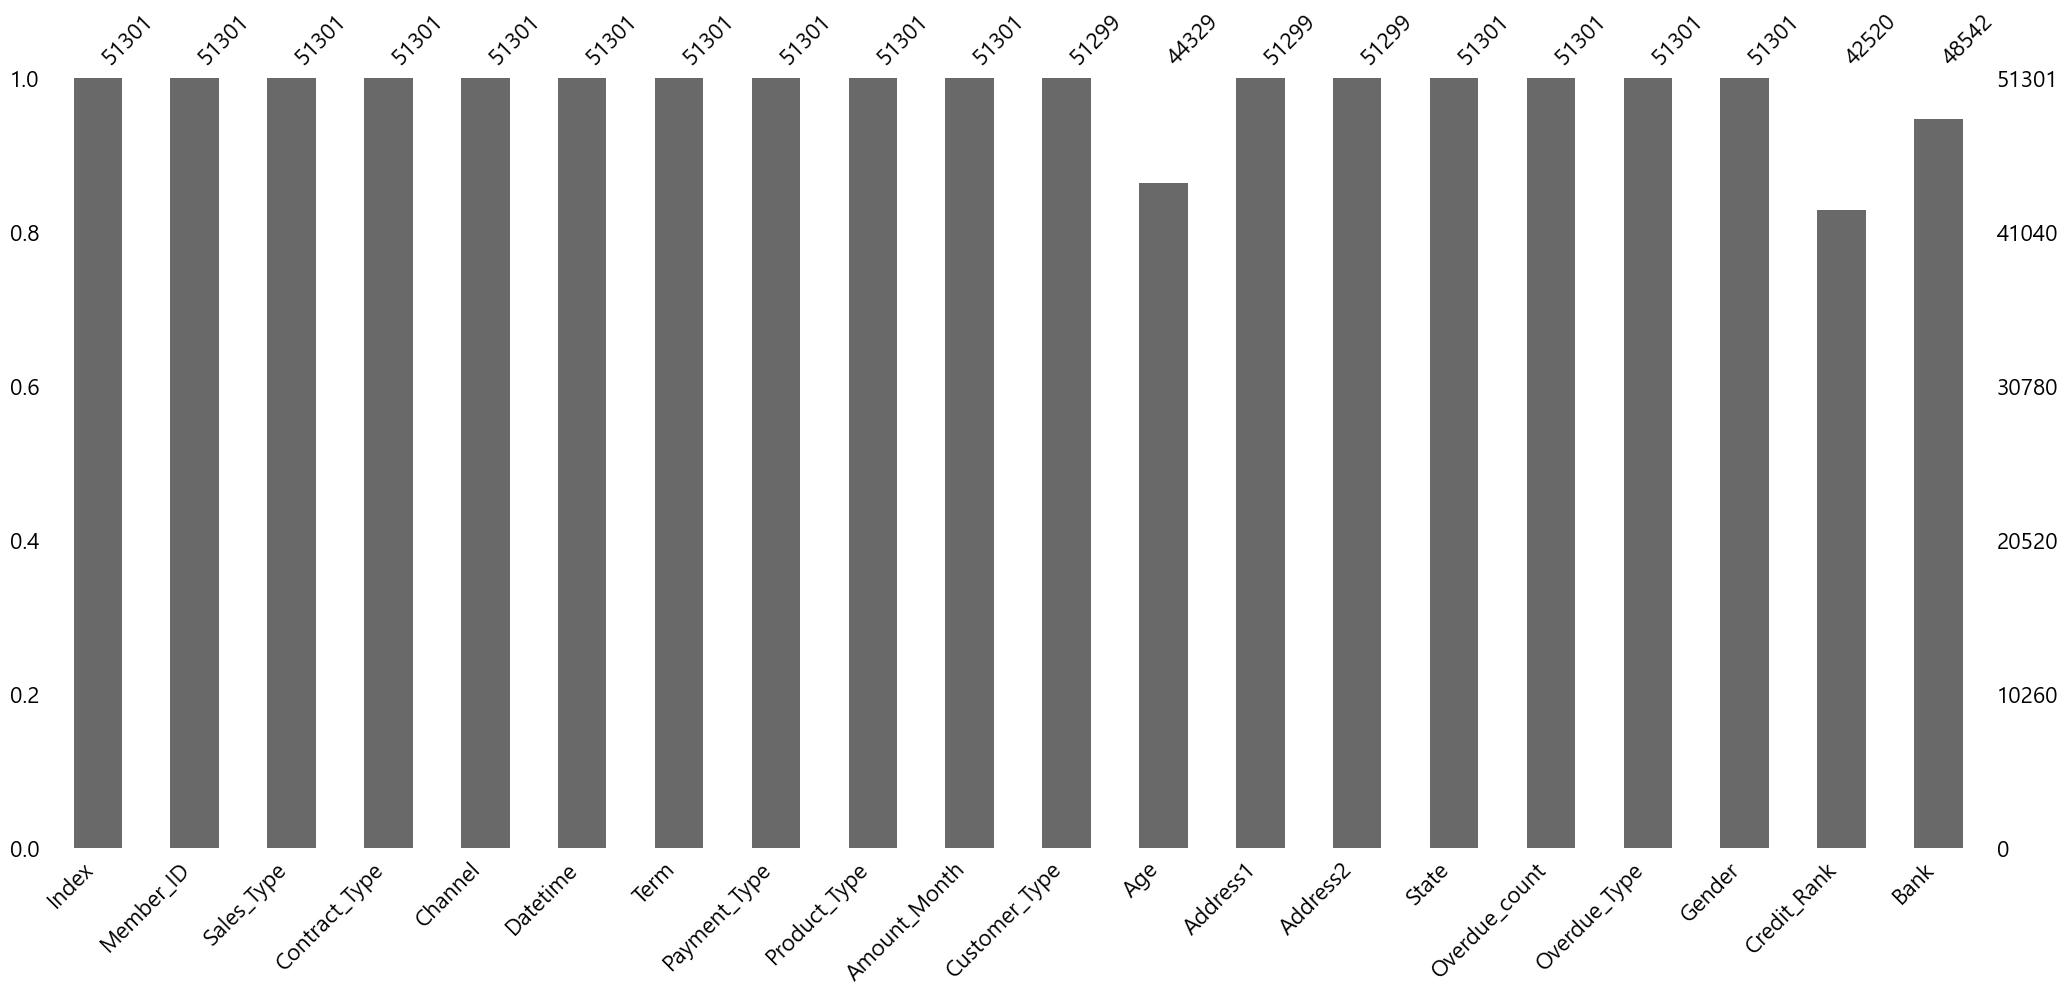

In [5]:
msno.bar(df1)

<AxesSubplot: >

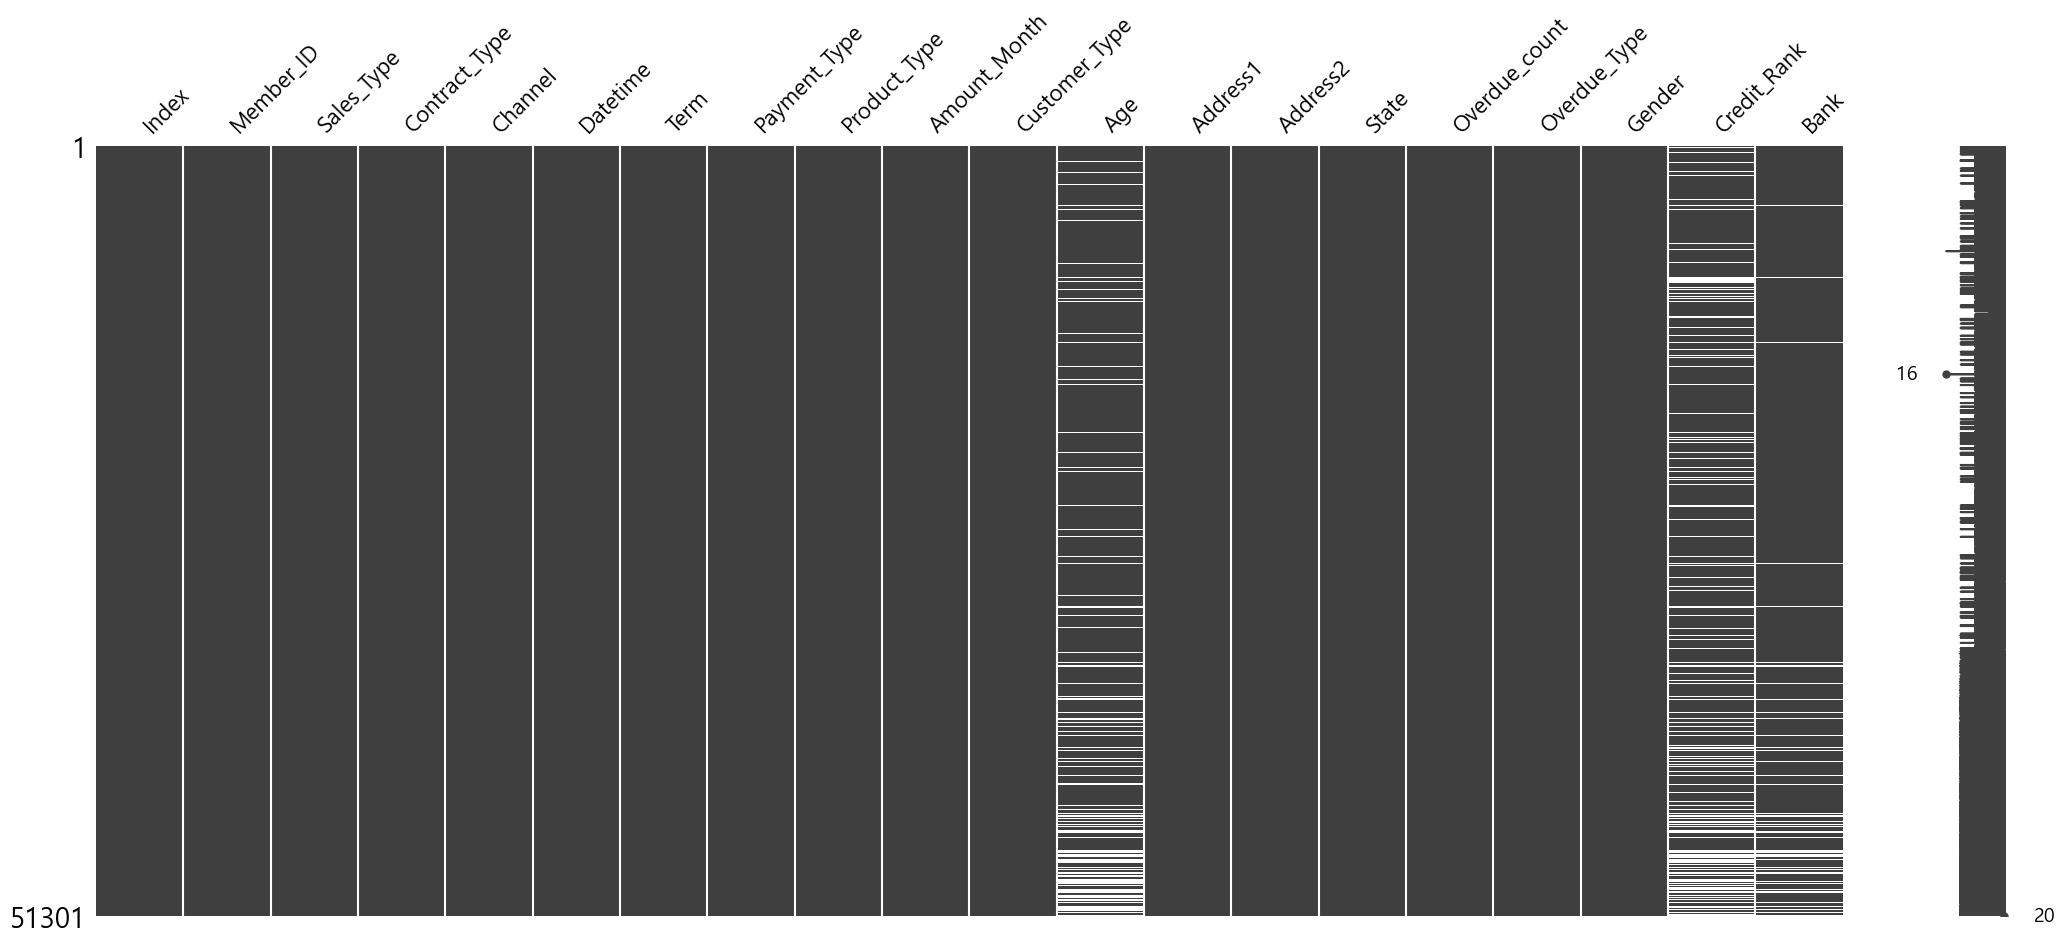

In [6]:
msno.matrix(df1)

<AxesSubplot: >

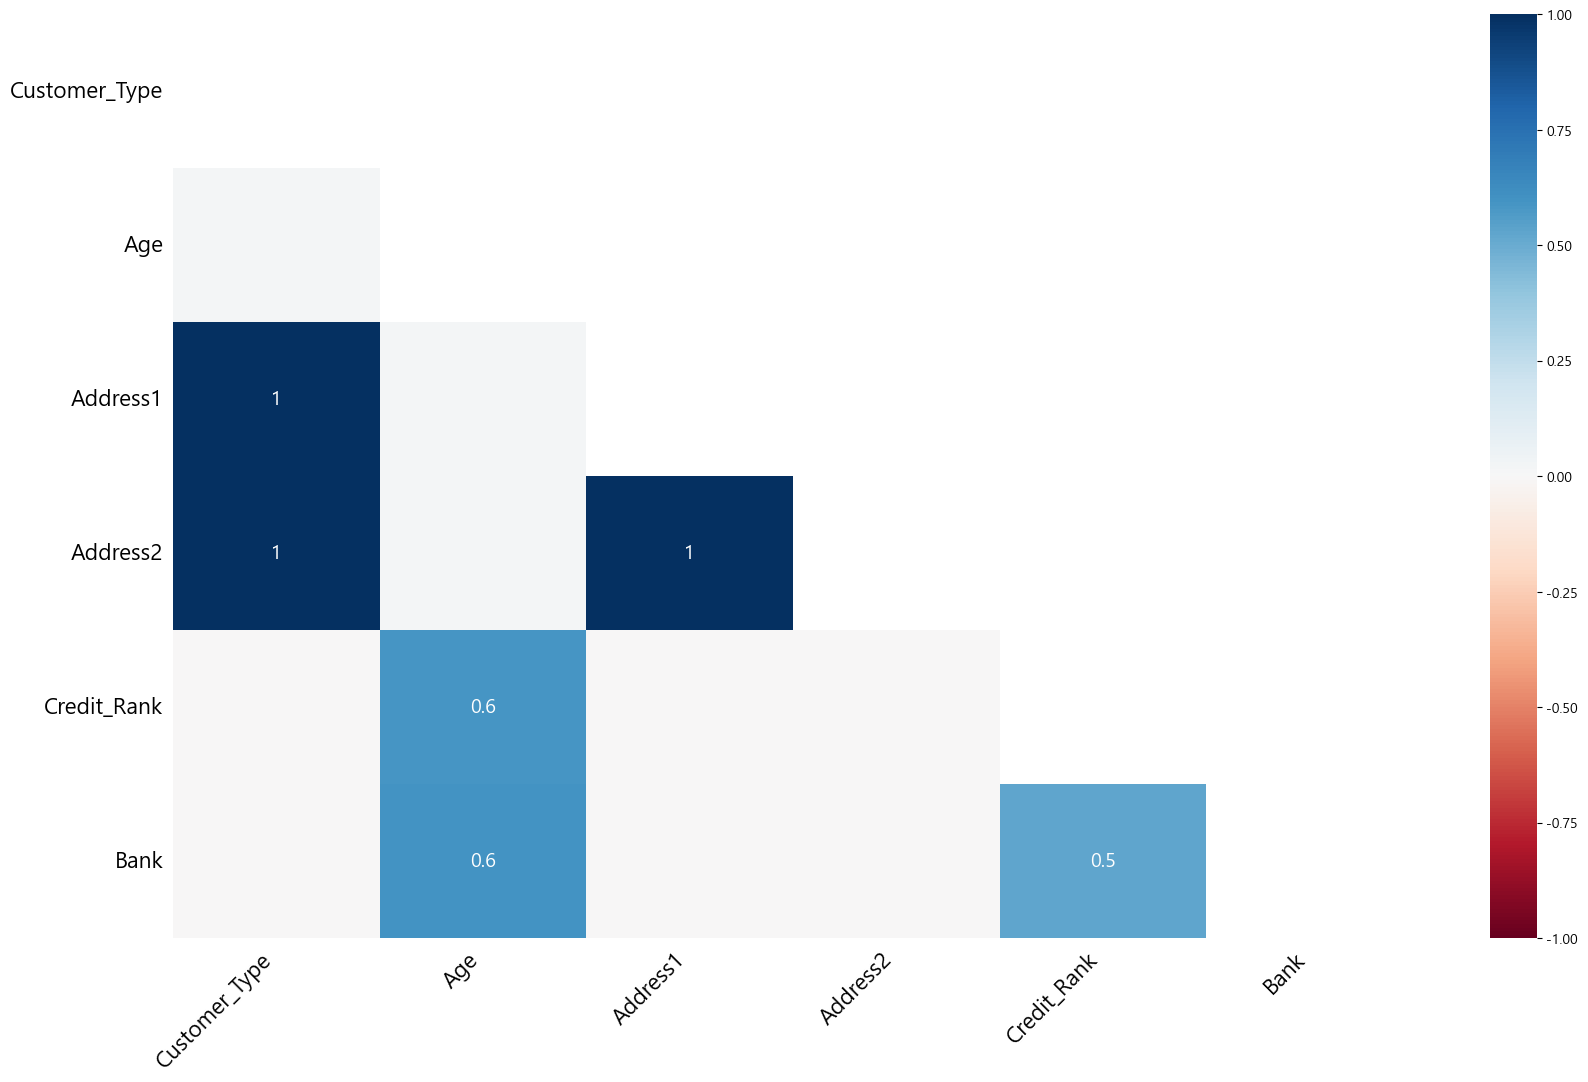

In [7]:
msno.heatmap(df1)

---
> # **독립성 분석**
> - ### 범주형, 범주형 변수에서 독립 분석
---

In [8]:
df1_cross=pd.crosstab(df1['Gender'],df1['Sales_Type'])
df1_cross

Sales_Type,렌탈,멤버십
Gender,,
남자,14733,966
여자,31750,3852


- ### 성별 항목과 판매유형 항목은 서로 독립적인가? 연관성이 있는가?
#### **귀무가설** : 성별과 판매유형 항목은 서로 독립이다 (연관성이 없다.)
#### **대립가설** : 성별과 판매유형 항목은 서로 독립이 아니다 (연관성이 있다.)
#### 카이제곱 통계량 : chi2 통게량 / P-value / 자유도 / 기대값

In [9]:
stats.chi2_contingency(df1_cross)

(278.2356916106161,
 1.8200099799409386e-62,
 1,
 array([[14224.60803883,  1474.39196117],
        [32258.39196117,  3343.60803883]]))

#### **P-value < 0.05 이므로 성별과 판매유형 항목은 연관성이 있다**

---
> ## **Mission 10**
> - #### 방송구분 데이터
---

In [10]:
df2 = pd.read_csv("12_Data.csv")
df2.head()

,방송Code,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
0,1.010036e+09,TV,50.0,52.7,녹화방송,재방_의류,10242138,[비지트인뉴욕콜렉션] 퓨어 캐시미어 롱코트,과세,65645345,...,73,9624136,1000,위탁매입,협력사배송,50.0,52.7,1,2020-01-03T00:10,2020-01-03T01:00
1,1.019126e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092003,[한삼인]순홍삼진(50ml*30포)*7박스+쇼7_2,과세,23774849,...,16,2547305,1000,위탁매입,직택배,30.0,19.1,1,2020-01-03T01:00,2020-01-03T02:00
2,1.019226e+09,TV,60.0,38.1,녹화방송,재방_건강식품,10092743,[단품_한삼인] 순홍삼진(50ml*30포)*1박스,과세,23774849,...,0,0,0,위탁매입,직택배,30.0,19.1,2,2020-01-03T01:00,2020-01-03T02:00
3,1.040337e+09,TV,60.0,19.7,재방송,재방_가공농산,10295865,이상용의 우리밀 크레마롤,과세,24568911,...,25,1080206,1000,위탁매입,협력사배송,60.0,19.7,1,2020-01-03T02:00,2020-01-03T03:00
4,1.021427e+09,TV,60.0,16.1,재방송,재방_신선수산,10113666,국내산 자숙 문어슬라이스 120g*9팩,면세,20131383,...,5,238512,1000,위탁매입,협력사배송,60.0,16.1,1,2020-01-03T03:00,2020-01-03T04:00


### 1. 방송구분 데이터의 빈도수 확인

In [11]:
df2.방송구분.value_counts()

생방송     18706
재방송      7538
녹화방송       39
Name: 방송구분, dtype: int64

### 2. 결측값, bar 그래프로 시각화

In [12]:
df2.isnull().sum()

방송Code      0
채널          0
소요분         0
가중분         0
방송구분        0
프로그램명       0
상품ID        0
상품명         0
매입과세구분      0
상품목표취급금액    0
상품목표주문금액    0
판매단가        0
수수료율        0
상품주문수량      0
상품주문금액      0
상품취소수량      0
상품취소금액      0
ARS금액       0
매입형태        0
배송방식        0
상품소요분       0
상품가중분       0
상품방송순번      0
방송시작시간      0
방송종료시간      0
dtype: int64

<AxesSubplot: >

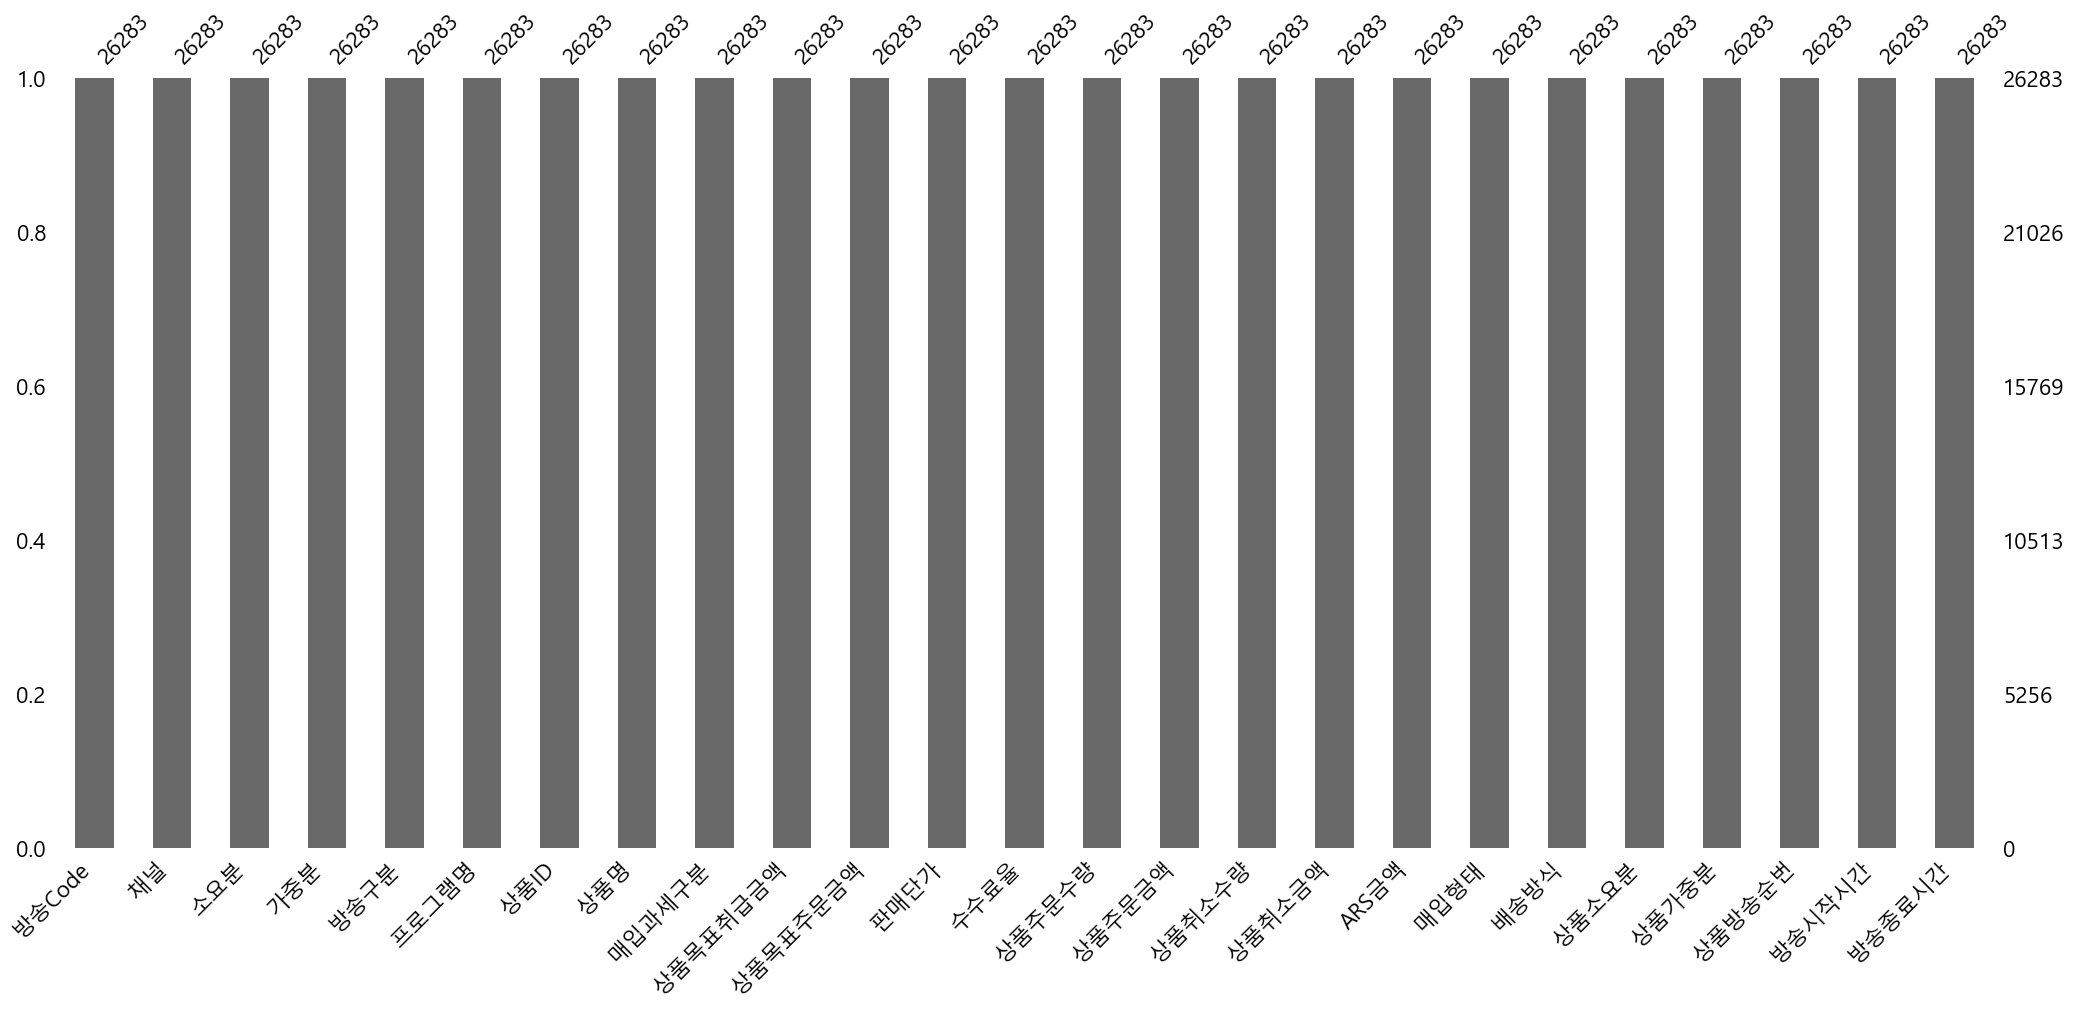

In [13]:
msno.bar(df2)

### 3. 방송구분에 따른 상품주문수량 평균

In [14]:
df2.pivot_table(index='방송구분',values='상품주문수량',aggfunc='mean')

,상품주문수량
방송구분,
녹화방송,337.871795
생방송,1154.316529
재방송,437.807774


### 4. df2의 모든 연속형 데이터의 기술통계량 확인

In [15]:
df2.describe()

,방송Code,소요분,가중분,상품ID,상품목표취급금액,상품목표주문금액,판매단가,수수료율,상품주문수량,상품주문금액,상품취소수량,상품취소금액,ARS금액,상품소요분,상품가중분,상품방송순번
count,2.628300e+04,26283.000000,26283.000000,2.628300e+04,2.628300e+04,2.628300e+04,2.628300e+04,26283.000000,26283.000000,2.628300e+04,26283.000000,2.628300e+04,26283.000000,26283.000000,26283.000000,26283.000000
mean,6.714543e+12,60.463501,62.738850,1.063470e+07,4.893658e+07,7.169959e+07,2.145554e+05,22.911692,947.609367,6.593023e+07,38.634593,3.145444e+06,1255.972454,37.090313,37.118088,2.854431
std,4.545276e+12,10.753614,33.412849,3.242029e+05,4.893987e+07,8.129376e+07,5.182702e+05,5.893382,1122.817191,9.141624e+07,52.981660,5.629631e+06,2092.334704,22.419075,31.435586,10.552536
min,1.010036e+09,2.900000,1.600000,1.001098e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,1.021254e+12,59.900000,42.800000,1.043544e+07,1.097226e+07,1.575876e+07,4.090000e+04,22.000000,85.000000,1.259542e+07,5.000000,4.884570e+05,1000.000000,18.700000,12.700000,1.000000
50%,1.006229e+13,60.000000,59.000000,1.058600e+07,3.448367e+07,4.971633e+07,5.990000e+04,25.000000,527.000000,4.068090e+07,21.000000,1.806076e+06,1000.000000,30.000000,27.700000,1.000000
75%,1.020260e+13,65.000000,90.400000,1.097324e+07,7.503096e+07,1.033874e+08,1.090000e+05,25.500000,1455.500000,9.044955e+07,54.500000,3.816610e+06,1000.000000,60.000000,53.800000,2.000000
max,1.309233e+13,180.000000,270.800000,1.118091e+07,7.378715e+08,1.229786e+09,7.990000e+06,52.770000,12119.000000,1.583191e+09,892.000000,2.335461e+08,30000.000000,145.000000,270.800000,99.000000


### 5. 방송구분 == 재방송 추출, 상품목표주문금액이 높은 상위 100개

In [16]:
df2[df2.방송구분=='재방송'].sort_values(by='상품목표주문금액',ascending=False).head(100)

,방송Code,채널,소요분,가중분,방송구분,프로그램명,상품ID,상품명,매입과세구분,상품목표취급금액,...,상품취소수량,상품취소금액,ARS금액,매입형태,배송방식,상품소요분,상품가중분,상품방송순번,방송시작시간,방송종료시간
14838,1.129148e+13,TV,120.0,167.5,재방송,재방_상조,10759036,예다함 상조,과세,445238913,...,3,13609092,0,위탁매입,협력사배송,120.0,167.5,1,2021-02-06T21:55,2021-02-06T23:55
23777,1.130238e+13,TV,70.0,88.4,재방송,재방_렌탈,11124605,[가자제주닷컴] 제주여행 2박 3일 패키지_14,과세,121415934,...,2,1028472,0,위탁매입,협력사배송,70.0,88.4,1,2021-09-16T20:15,2021-09-16T21:25
22868,1.051229e+13,TV,59.8,93.5,재방송,렌탈,11025783,"[렌탈]스마트카라 음식물처리기(PCS 350, PCS 500D)",과세,120501164,...,4,5393456,0,위탁매입,협력사배송,59.8,93.5,1,2021-08-25T20:45,2021-08-25T21:45
23763,1.129238e+13,TV,60.0,78.2,재방송,재방_상조,11109971,"예다함 상조(19.08 사은품변경_로봇청소기,에어프라이기,소댕5종)",과세,229977054,...,5,22681820,0,위탁매입,협력사배송,60.0,78.2,1,2021-09-16T09:40,2021-09-16T10:40
23787,1.051238e+13,TV,60.0,71.5,재방송,재방_렌탈,11025783,"[렌탈]스마트카라 음식물처리기(PCS 350, PCS 500D)",과세,98273111,...,4,5393456,0,위탁매입,협력사배송,60.0,71.5,1,2021-09-16T22:25,2021-09-16T23:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22169,1.007222e+13,TV,60.0,69.3,재방송,재방_인테리어,11065166,무이자_[베디스]LED 서랍형 침대 K_협탁,과세,83926133,...,3,1549092,1000,위탁매입,협력사배송,10.0,11.6,1,2021-08-09T19:40,2021-08-09T20:40
4092,1.010409e+12,TV,65.0,52.4,재방송,재방_의류,10434936,[Johanex S] 요하넥스S 코트나 트렌치 재킷,과세,61697610,...,108,6576351,1000,위탁매입,협력사배송,65.0,52.4,1,2020-04-20T06:10,2020-04-20T07:15
13034,1.010130e+13,TV,70.0,67.2,재방송,재방_의류,10703217,[미넴레이디] 폭스풀스킨 롱 해비구스 점퍼,과세,60624083,...,218,46788308,10000,위탁매입,협력사배송,35.0,33.6,1,2020-12-18T23:45,2020-12-19T00:55
14861,1.014149e+13,TV,60.0,68.1,재방송,재방_속옷,10724692,레쓸 에어로웜 란쥬쉐이퍼6종,과세,86086381,...,34,2099229,1000,위탁매입,협력사배송,60.0,68.1,1,2021-02-07T09:25,2021-02-07T10:25


### 6. 방송구분에서 녹화방송, 재방송 두 집단의 상품주문수량의 평균의 차이가 있는지 가설검정

In [17]:
stats.normaltest(df2[df2.방송구분.isin(['녹화방송','재방송'])].상품주문수량)

NormaltestResult(statistic=3970.63131828541, pvalue=0.0)

#### p value < 0.05 이므로 대립가설 채택 : 정규성을 따르지 않음

In [18]:
stats.ranksums(df2[df2.방송구분.isin(['녹화방송'])].상품주문수량,df2[df2.방송구분.isin(['재방송'])].상품주문수량)

RanksumsResult(statistic=-1.205255162207089, pvalue=0.22810481319295106)

#### p value > 0.05 이므로 귀무가설 채택 : 평균에 차이 없음

### 7. '방송구분'에서 '녹화방송'에 해당하는 데이터만 뽑아 '상품주문금액'의 평균과 중앙값의 차이

In [19]:
df2[df2.방송구분.isin(['녹화방송'])].상품주문수량.mean() -df2[df2.방송구분.isin(['녹화방송'])].상품주문수량.median()

137.87179487179486

### 8. 상품목표취급금액, 상품주문금액 간의 산점도

<AxesSubplot: xlabel='상품목표취급금액', ylabel='상품주문금액'>

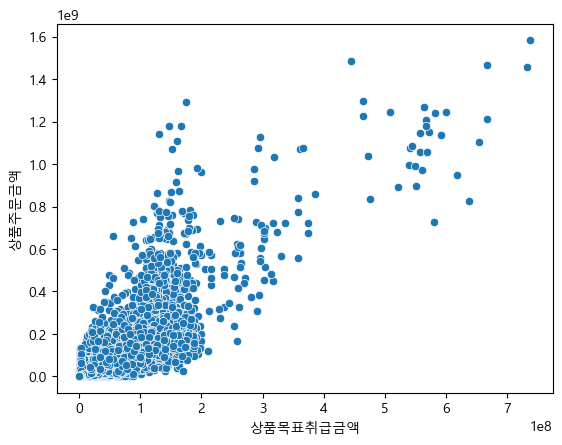

In [20]:
sns.scatterplot(x=df2.상품목표취급금액, y=df2.상품주문금액)

### 9. 매입형태에 따라 배송방식이 달라지는지

In [21]:
df2_cross=pd.crosstab(df2['매입형태'],df2['배송방식'])
df2_cross

배송방식,당사배송,직택배,협력사배송
매입형태,,,
위탁매입,1,996,24267
직매입,1019,0,0


In [22]:
stats.chi2_contingency(df2_cross)

(26256.193038804344,
 0.0,
 2,
 array([[  980.45428604,   957.38477343, 23326.16094053],
        [   39.54571396,    38.61522657,   940.83905947]]))

#### p value < 0.05 이므로 대립가설 채택 : 연관성이 있다.

---
> ## **머신러닝 구현**
---

In [23]:
Y = df1['State'].replace({'계약확정':0,'기간만료':0,
                          '해약확정':1,'해약진행중':1})
X = df1[['Sales_Type','Gender','Term','Amount_Month',
         'Credit_Rank','Age','Product_Type']]

In [24]:
from sklearn.model_selection import train_test_split # 학습 검증 데이터 분할
from imblearn.pipeline import make_pipeline # 학습 + 특성공학 파이프라인 구축 
from sklearn.compose import make_column_transformer # 각 항목의 타입별로 파이프 분할

from sklearn.impute import SimpleImputer # 결측치 처리
from sklearn.preprocessing import MinMaxScaler # 숫자 스케일링
from sklearn.preprocessing import OneHotEncoder # 문자 데이터 인쾽
from imblearn.over_sampling import SMOTE # 불균형 데이터 처리

from sklearn.ensemble import RandomForestClassifier # Bagging
from sklearn.model_selection import GridSearchCV #교차검증 + 하이퍼 파라미터 튜닝
from sklearn.metrics import classification_report # 평가

### **데이터 분할**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

### **파이프라인 구축**

In [26]:
def pipe_model_func(model):
    numeric_pipe = make_pipeline( SimpleImputer(strategy='mean'),MinMaxScaler())
    category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent'), OneHotEncoder())
    numeric_list = X.describe().columns.tolist()
    category_list = X.describe(include='object').columns.tolist()
    preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                             (category_pipe, category_list))
    model_pipe=make_pipeline(preprocessing_pipe,SMOTE(),model)
    return model_pipe

In [27]:
model_pipe = pipe_model_func(RandomForestClassifier())

### **하이퍼파라미터** 설정

In [28]:
hyperparameter_dict = {'randomforestclassifier__max_depth':range(5,10),
                       'randomforestclassifier__min_samples_split' : [10,30,50],
                       'randomforestclassifier__criterion':['gini','entropy'],
                       'randomforestclassifier__n_estimators' :[50,100,150]}
grid_model = GridSearchCV(model_pipe, param_grid = hyperparameter_dict,cv=3,
                          scoring='f1',n_jobs=-1)
grid_model.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Term',
                                                                          'Amount_Month',
                                                                          'Credit_Rank',
                                                                          'Age']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHo...
                                                                         ['Sales_Type',
                                                                          'Gender',
                                                                          'Product_Type'])])),
                                       ('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': range(5, 10),
                         'randomforestclassifier__min_samples_split': [10, 30,
                                                                       50],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  150]},
             scoring='f1')

In [29]:
best_model =grid_model.best_estimator_

In [30]:
def evaluation_func(best_model):
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print('학습능력평가')
    print(classification_report(Y_train,Y_train_pred))
    print('일반화능력평가')
    print(classification_report(Y_test, Y_test_pred))

In [31]:
evaluation_func(best_model)

학습능력평가
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     37984
           1       0.10      0.39      0.15       491

    accuracy                           0.95     38475
   macro avg       0.54      0.67      0.56     38475
weighted avg       0.98      0.95      0.96     38475

일반화능력평가
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     12681
           1       0.08      0.37      0.14       145

    accuracy                           0.95     12826
   macro avg       0.54      0.66      0.55     12826
weighted avg       0.98      0.95      0.96     12826



### **변수 중요도 : Feature Importance**
- 분류를 수행할 때, 각 피쳐가 얼마나 분류에 기여했는가를 나타내는 척도
- Data를 나눌 때, 기여도가 높은 Column을 확인 가능
- 변수 중요도가 높다고 해서 Y값이 직접적으로 변하지는 않음

In [32]:
best_model['randomforestclassifier'].feature_importances_

array([0.31695913, 0.29605145, 0.03720729, 0.03553954, 0.10785943,
       0.12332656, 0.00292593, 0.00210219, 0.04178901, 0.02630398,
       0.00112789, 0.00289435, 0.00519322, 0.00072001])

In [33]:
best_model['randomforestclassifier']

RandomForestClassifier(max_depth=5, min_samples_split=30)

In [34]:
encoder_list = best_model.named_steps['columntransformer'].transformers_[1][1].named_steps['onehotencoder'].get_feature_names_out().tolist()
encoder_list

['x0_렌탈',
 'x0_멤버십',
 'x1_남자',
 'x1_여자',
 'x2_DES-1',
 'x2_DES-2',
 'x2_DES-3A',
 'x2_DES-R4',
 'x2_ERA',
 'x2_MMC']

In [35]:
df_importance = pd.DataFrame()
df_importance['Feature'] = pd.Series(numeric_list + encoder_list)
df_importance['Importance'] = best_model['randomforestclassifier'].feature_importances_

NameError: name 'numeric_list' is not defined

In [ ]:
sns.barplot(data=df_importance, y='Feature', x='Importance')